In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import requests

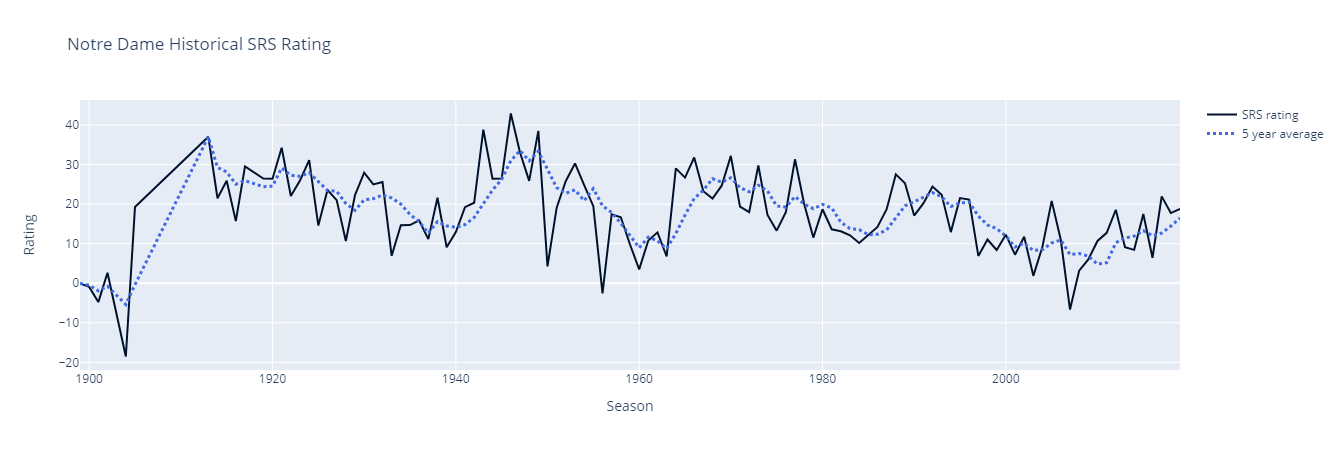

In [13]:
# Pick a team
team_name = 'Notre Dame'

# Get team colors to make charts pretty
response = requests.get("https://api.collegefootballdata.com/teams/fbs")
teams = pd.read_json(response.text).set_index('school')
team = teams.loc[team_name]

team.name = team_name

# Get team SRS history
response = requests.get("https://api.collegefootballdata.com/ratings/srs", params={"team": team_name})
ratings = pd.read_json(response.text)

# Calculate column for rolling 5 year average
ratings['rolling_avg'] = ratings.apply(lambda x: ratings.query("year <= {0} and year > {1}".format(x.year, (x.year - 5))).rating.mean(), axis=1)

# Plot the stuff
fig = go.Figure()

# Add a line for yearly SRS rating
fig.add_trace(go.Scatter(
    x=ratings['year'],
    y=ratings['rating'],
    name = 'SRS rating',
    line=dict(color=team.color)
))

# Add another line for 5 year average
fig.add_trace(go.Scatter(
    x=ratings['year'],
    y=ratings['rolling_avg'],
    name='5 year average',
    line=dict(color='royalblue', dash='dot', width=3)
))

# Throw on some labels
fig.update_layout(title='{0} Historical SRS Rating'.format(team_name),
                   xaxis_title='Season',
                   yaxis_title='Rating')

# Show that chart!
fig.show()